## Bootstrap Aggregation and Random Forest Classifier
In the [previous](https://github.com/Xujan24/Machine-Learning/blob/master/Boosting.ipynb) tutorial, we looked at one of the popular ensemble technique in machine learning, boosting, and looked in details on one of the most popular and widely used boosting technique called adaptive boositing, in short `AdaBoost`. In this tutorial, we will be looking another ensemble technique, known as boostrap aggregation, in short `Bagging` and one of it's variant called Random Forest.

Like any other ensemble technique, bagging also uses a set of weak learners and convert them to a single, more powerful classifier. Unlike boosting, in which the weak learners are trained in a sequential manner, i.e. one weak learner is trained only after the previous weak learner has been trained, in bagging the weak learners can be trained without any kind of sequential order. This means, every weak learner is trained independentely of other weak learners and doesn't affect the overall performance of the final classifier in whatever sequence they were trained.

### What is Bootstrap?
In statistics, bootstraping is a process of random sampling from a given sample with replacement. Each of these new samples generated from the given sample is called a bootstrap sample. The key idea about bootstraping is that by resampling a given data and performing inference about the sample using the resampled data, we can actually make an inference about the whole population. Here, *population* means a complete set of elements with a specialized set of characteristics and a *sample* is just a subset of it. For instance, if you are interested in determining the average height of a man, then the population would consist of every man living on this planet and a sample would just be a subset of it. For example, a set of all men in your locality.

### Bootstrap Aggregation
Bootstrap aggregation, or `bagging` is an ensemble method, where we generate multiple boostrap samples from the given training dataset, train weak classifiers on each of these bootstrap samples and obtain an aggreagte classifier using the trained weak classifiers. When predicting a numerical value, `bagging` aggregates the predictions made by each of the weak classifiers and does a plurality voting when predicting a class. Since it averages the predictions over a collection of boostrap samples, it reduces variance (How? we will discuss in the next section). So, `bagging` can help to achieve better predictive performance, when used with a model that has low biase and high variance. And decision trees are considered to have low biase and high variance, hence decision trees are commmonly used as a weak classifier in `bagging`. However, we can use any kind of learning algorithm as a base learner. A typical bootstrap aggregation algorithm works as follows:
1. Generate bootstrap samples ($K$ times) from the given training set: $X=x_1,x_2, ..., x_N$ and $Y = y_1, y_2, ..., y_N$.
2. For each generated bootstrap sample, train a base learner $\varphi(x,L_k)$, where $k = 1,2,..., K$ and $L_k$ represents the $k^{th}$ bootstrap sample.
3.After training, make prediction for the unseen samples as below:
 1. For regression, average the predictions made by each of the base learners as the final prediction, i.e. $\hat{\varphi} = \frac{1}{K}\sum_{k=1}^K \varphi(x')$.
 2. For classification, predict the final class by simply taking the majority vote. Let $N_j  = \#\{k;\varphi(x') = j\}$, where $j \in \{1,2,..., J\}$, denotes a class $j$ out of $J$. So, $N_j$ stores how many times the base learners has predicted each of the classes in $J$. Now, the final prediction can be made by taking $argmax_jNj$

### Why bagging works?
This section describes how aggregating helps to decrease the mean-squared error. The following explanation has been taken from Breiman's work, which you can view through [this](https://www.stat.berkeley.edu/~breiman/bagging.pdf) link.

Let $L$ represents a bootstrap sample and each $(y,x)$ case in $B$ are independently drawn from the given probability distribution $P$. Also $y$ is numeric and we predict $y$ by $\varphi(x,L)$, i.e. $\varphi(x,L)$ represents our base learner. Suppose, we have $k$ bootstrap samples, then the aggregate predictor will just be an average of $\varphi(x, L_k)$ over $k$. Let $\varphi_A$ denotes the aggregate predictor then:<br />
<center>$\varphi_A(x, P) = E_L\varphi(x, L)$</center>

Let $Y, X$ be random variables having the distribution $P$ and independent of $L$. Then the average prediction error $e$ in $\varphi(x, L)$ will be:
<center>$e = E_LE_{Y,X}(Y-\varphi(X,L))^2$</center>

And the error for the aggregate predictior will be:
<center>$e_A=E_{Y,X}(Y-\varphi_A(X, P))^2$</center>


Expanding $e$ and using the inequality $EZ^2 \geq (EZ)^2$, we will get:
<center>
  $e = EY^2 - 2EYE_L\varphi(X, L) + E_{Y,X}E_L\varphi^2(X, L)$ <br />
  = $EY^2 - 2EY\varphi_A + E_{Y,X}\varphi^2_A$<br />
  $\geq E(Y-\varphi_A)^2 = e_A$
</center>

Thus, the aggregate predictor will have lower mean-squared error than that of each of the base predictors. How low is the mean-squared error for the aggregate predictor, compared to each of the base predictors, depends on how unequal the two sides of the inequalities, $E_L \varphi^2(x, L) \geq [E_L(\varphi(x, L)]^2$, are. If $\varphi(x, L)$ doen't change too much with respect to each of the bootstrap samples, $L$, then the two sides will be nearly equal, and hence aggreation doesn't help. However, if $\varphi(x, L)$ varies a lot with respect to the bootstrap samples, then the aggregation will produce improvements over base learners.<br />
Now, the bagged estimates is not $\varphi_A(x, P)$ but rather, <br />
<center>
  $\varphi_B(x) = \varphi_A(x, P_L)$<br />
</center>

, where $P_L$ is called the bootstrap approximation to $P$ and each points, $(y_n, x_n) \in L$, are distributed with a probability of $\frac{1}{N}$.<br />

Now $\varphi_B$ is caught into two scenarios: if $P_L$ is unstable then the aggregation will produce improvements over base learners and if it is stable then the aggregation won't improve the performance as $\varphi_A(x, P)\simeq\varphi(x, L)$. Another limitation of bagging is that, for some dataset, if the base learner is close to the limits of accuracy attainable on that dataset, then bagging will not produce further improvement on the base learner. These are also applicable on classification problems. For the similar reasoning behind why bagging works for classification, you can go through the Breiman's work. Alternatively, you can also check [this](http://www.stat.cmu.edu/~ryantibs/datamining/lectures/24-bag.pdf) lecture slides, for a simpler explanation.

### Random Forest
Random forest is an example of `bagging`. It is a forest of decision trees. And what makes this forest, random, is the fact that while training each tree, it randomly selects a subset of features, from the entire feature space and picks the most favourable feature, from the random subset, to make a split. This process is also referred to as `feature bagging`. The main reason for doing this is to reduce the correlation among the trees. For instance, if one or few input features are very strong predictor of the output then these features will be selected to make a split in multiple trees and makes the trees highly correlated. Hence, by introducing randomness in selecting the feature to make a split would help to reduce this correlation. Tin Kam Ho created the first algorithm for random decision forests by introducing random selection features and later extended by Leo Breiman and Adele Cutler by combining the concept of `bagging` to Ho's idea. The following are some of the desirable characteristics of Random Forest (Breiman L. 2001, *Random Forests*, [pdf](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)):
1. Its accuracy is as good as Adaboost and sometimes better.
2. It's relatively robust to outliers and noise.
3. It's faster than bagging or boosting.
4. It gives useful internal estimates of error, strength, correlation and variable importance.
5. It's simple and easily parallelized.

### Out-of-Bag Error
Out-of-bag (OOB) error is a method to measure the prediction error of the bagged estimators. Each of the bootstrap samples contains roughly two-third of the given training samples. This means the remaining one-third of the instances are left out, which serves as a test set without explicitly dividing the given dataset into training and test set. As the forest is built, each tree can thus be tested on the samples that are left out when building that tree. This is as accurate as using a test set of the same size as the training set (Breiman 1996b). <br />

Given a training set $T$, from bootstrap samples $T_k$, train a number of decision trees $h(x, T_k)$ and combine their outpus to form the bagged classifier. For each $y, x$ in the training set, aggregate the output of only those trees for which $T_k$ doesnot contains $y, x$. These are called OOB classifiers. Then the OOB estimate for the generalization error is the error rate of the OOB classifiers on the training set. <br />

The OOB methods can also be used to estimate the strength and correlation( [pdf](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf), see Appendix II).

### Random Forest in Action
Now, we have build some theoritical intitutions on bootstrap aggregation and random forest, let's create one using `scikit-learn` package. In this tutorial, we will be using the same wine dataset which was used to in the `AdaBoost` tutorial.

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

wineData = datasets.load_wine()        #returns a bunch object

# get the input features X and corresponding classes Y
X, Y = wineData.data, wineData.target

# get the labels for each class
classLabels = wineData.target_names

# split the dataset into train and test set.
train_x, test_x, train_y, test_y = train_test_split(X, Y,
                                                    test_size=0.3,    # 30% will be used as test set
                                                    random_state=123, # random seed
                                                    shuffle=True      # shuffle the dataset when splitting
                                                   )

# create a random forest classifier
# for detailed documentation visit https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
model = RandomForestClassifier(n_estimators = 4, # number of trees
                               max_depth = 3, # maximum depth of the tree
                               min_samples_split = 10, # minimum number of samples required to make a split
                               max_features = 4, # number of features to consider when looking for the best split
                               random_state = 123
                              )

# train the model
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [67]:
# make prediction on test set

pred = model.predict(test_x)
print(pred)

# calculate the model accuracy
acc = model.score(test_x, test_y)
print("The accuracy of the model is %f on the test dataset." %acc)


[2 1 2 1 1 2 0 2 2 1 1 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 1 0 0 0 0 1 1 2 1 2
 0 1 1 2 2 0 0 0 0 0 1 1 1 1 2 2 1]
The accuracy of the model is 0.925926 on the test dataset.


### Using Out-of-Bag Errors to determine the suitable value of `n_estimators`
In this part, we will show how the OOB error can be measured at the addition of each new tree during training. This will be helpful to approximate the required number of trees at which the error stabilizes. In this tutorial we will be creating three random forest classifiers with max_features set to 3, 5 and None for which the n_estimators will vary between 1 to 30

In [0]:
import matplotlib.pyplot as plt
from collections import OrderedDict

# set the random seed value
RANDOM_STATE = 123

clfs = [
    ("RandomForestClassifier, max_features = 3",
    RandomForestClassifier(warm_start = True,
                           max_features = 3,
                           oob_score = True,
                           random_state = RANDOM_STATE)),
    ("RandomForestClassifier, max_features = 5",
    RandomForestClassifier(warm_start = True,
                           max_features = 5,
                           oob_score = True,
                           random_state = RANDOM_STATE)),
    ("RandomForestClassifier, max_features = None",
    RandomForestClassifier(warm_start = True,
                           max_features = None,
                           oob_score = True,
                           random_state = RANDOM_STATE)),
]

# storing the n_estimators and corresponding OOB_error as
# a (<n_estimators>, <error rate>) pairs for each classifiers

oob_error_rate = OrderedDict((label, []) for label, _ in clfs)


# set the minimum and maximum values for n_estimators
min_estimators = 1
max_estimators = 30


for label, clf in clfs:
  for i in range(min_estimators, max_estimators+1):
    clf.set_params(n_estimators = i) # set the value for n_estimators
    clf.fit(X, Y) # train the model on whole dataset
    
    oob_error = 1-clf.oob_score_
    oob_error_rate[label].append((i, oob_error))


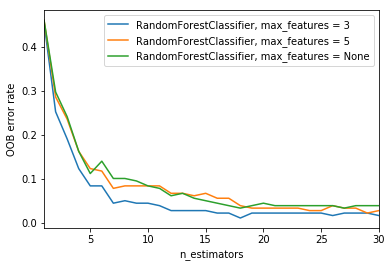

In [99]:
# generate the OOB error rate vs n_estimators plot

for label, clf_err in oob_error_rate.items():
  x, y = zip(*clf_err)
  plt.plot(x, y, label = label)

  
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

From the above plot, we can see that the OOB error rate is low for the classifiers with max_features = 3 in general. Initially the oob error rate is very high, more than 0.4 for each of the three classifiers and with the addition of each new trees, the curves start to fall down. One thing to notice is that, after n_estimators = 18 (approx.), the error rate tends to increase and we can see bumps on each of the curve. Hence, in this case, I would go with max_features = 3 and n_estimator = something in between 15 and 20, may be 17. <br />
Let's create a random forest classifier along with these values and see whether it improves the predictive performance compared to what we got in the begining of this tutorial.

In [109]:
new_model = RandomForestClassifier(n_estimators = 17,
                           max_depth = 3,                               
                           min_samples_split = 10,                               
                           max_features = 3,                               
                           random_state = 123
                          )
new_model.fit(train_x, train_y)

new_model_acc = new_model.score(test_x,test_y)

print ("The accuracy of the new model is %f on test dataset" % new_model_acc)

The accuracy of the new model is 1.000000 on test dataset


Compared to the accuracy for the model that we created in the begining (which is 0.925926), we have made a nice improvement on the test dataset by simply setting the value for the n_estimators to 17 and max features to 3. In this case we got a test accuracy of 1, which is rare. Here the dataset is tiny compared to the dataset we will be dealing with in real scenario, with fewer input feature space.

### Next
In the next tutorial, we will be looking at support vector machines. Till then you can try implementing these ensemble techniques on other dataset and compare their predictive performance.